# Reading dataset

In [17]:
# import library and read dataset
# import library and read dataset
import pandas as pd

df_reviews = pd.read_csv('IMDB Dataset.csv')
df_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [21]:
# take a sample of 10000 rows to make processing faster and get imbalance data
# 9000 positives
df_positive = df_reviews[df_reviews['sentiment']=='positive'][:9000]
# 1000 negative
df_negative = df_reviews[df_reviews['sentiment']=='negative'][:1000]

In [22]:
df_reviews_imb = pd.concat([df_positive, df_negative])

# 2. Dealing with Imbalanced Classes

In [23]:
# Know about the values better
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

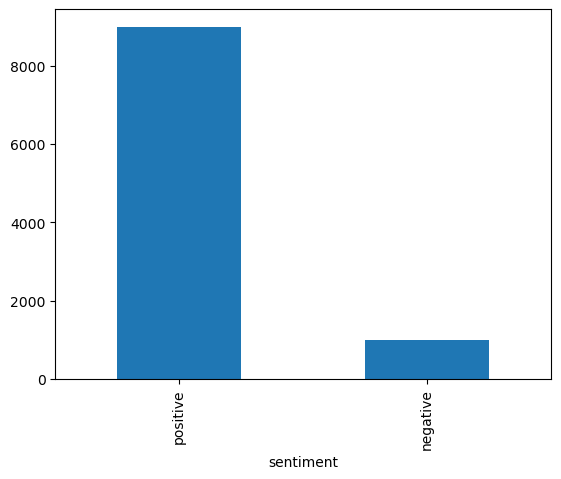

In [24]:
# Make a barplot to show how data is distributed 
df_reviews_imb.value_counts('sentiment').plot(kind='bar')

## 2.1. Balancing data with .sample()

In [ ]:
# check the length of the negative reviews 
length_negative = len(df_reviews_imb[df_reviews_imb['sentiment']=='negative'])
length_negative

1000

In [ ]:
# make undersample of positive reviews by using the .sample() method
df_reviews_positive = df_reviews_imb[df_reviews_imb['sentiment']=='positive'].sample(n=length_negative)

In [28]:
# Look at the 'df_reviews_positive'
df_reviews_positive

,review,sentiment
2904,This new movie by Jeskid is awesome! Check it ...,positive
5967,"""Stargate SG-1"" follows the intergalactic expl...",positive
734,Human Traffic is a view into an average weeken...,positive
6912,Diane Keaton gave an outstanding performance i...,positive
6752,"As is the case with many films of this ilk, my...",positive
...,...,...
4026,This is a great film. If this is any indicatio...,positive
5487,It is clear this film's value far supersedes t...,positive
13142,I wasn't expecting a whole lot when I rented t...,positive
13319,The setting and actors make this television mo...,positive


In [30]:
# In the same way, create the negative reviews also
df_reviews_negative = df_reviews_imb[df_reviews_imb['sentiment']=='negative']
df_reviews_negative

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


In [31]:
# Concatinate the psotive and negative reviews
df_reviews_bal = pd.concat([df_reviews_positive, df_reviews_negative])

In [32]:
# check the balanced df_reviews_bal 
df_reviews_bal

,review,sentiment
2904,This new movie by Jeskid is awesome! Check it ...,positive
5967,"""Stargate SG-1"" follows the intergalactic expl...",positive
734,Human Traffic is a view into an average weeken...,positive
6912,Diane Keaton gave an outstanding performance i...,positive
6752,"As is the case with many films of this ilk, my...",positive
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


In [34]:
# Reset the index also
df_reviews_bal.reset_index(drop=True, inplace=True)

In [35]:
df_reviews_bal

,review,sentiment
0,This new movie by Jeskid is awesome! Check it ...,positive
1,"""Stargate SG-1"" follows the intergalactic expl...",positive
2,Human Traffic is a view into an average weeken...,positive
3,Diane Keaton gave an outstanding performance i...,positive
4,"As is the case with many films of this ilk, my...",positive
...,...,...
1995,Stranded in Space (1972) MST3K version - a ver...,negative
1996,"I happened to catch this supposed ""horror"" fli...",negative
1997,waste of 1h45 this nasty little film is one to...,negative
1998,Warning: This could spoil your movie. Watch it...,negative


In [36]:
# Verify the numnbers of postive and negative 
df_reviews_bal.value_counts("sentiment")

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

## 2.2. Balancing data with RandomUderSampler

In [37]:
# WE have to instal the library
!pip install imblearn


In [39]:
from imblearn.under_sampling import RandomUnderSampler

In [40]:
rus = RandomUnderSampler(random_state=0)

In [ ]:
# TO resample the df_reviews_bal
df_reviews_bal, df_reviews_bal['sentiment'] = rus.fit_resample(df_reviews_imb[['review']],df_reviews_imb['sentiment'])


In [46]:
# verify
df_reviews_bal.value_counts("sentiment")

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

## 2.3. Splitting data into train and test

In [52]:
# import train_test_split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_reviews_bal, test_size=0.33,
                               random_state=42)

# Check both the train and test data
train
test

,review,sentiment
11301,Refreshing `lost' gem! Featuring effective dia...,positive
681,Never saw the original movie in the series...I...,negative
7513,"Once upon a time, in Sweden, there was a poor ...",positive
1821,"At the beginning of the film, you might double...",negative
549,Another Spanish movie about the 1936 Civil War...,positive
...,...,...
207,"I have seen most, if not all of the Laurel & H...",negative
7616,D.W. Griffith could have made any film he want...,positive
13483,"Cardiff, Wales. A bunch of 5 mates are deeply ...",positive
1051,I rented this movie with my friend for a good ...,negative


In [54]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [ ]:
train_x


144      I just got back from this free screening, and ...
1839     Claire Denis's movies seem to fall into one of...
16588    One must admit, that Dev has an eye for beauty...
742      Mario Lewis of the Competitive Enterprise Inst...
9464     The first, and far better, of Kevin Kline's tw...
                               ...                        
10644    I saw the movie in Izmir as the closing film o...
16133    This is a great documentary and above comments...
1739     Obviously, the comments above that fawn over t...
2443     Robert Carlyle excels again. The period was ca...
1467     A convict serving time comes forward to give t...
Name: review, Length: 1340, dtype: object

In [57]:
train_y

144      negative
1839     negative
16588    positive
742      negative
9464     positive
           ...   
10644    positive
16133    positive
1739     negative
2443     positive
1467     positive
Name: sentiment, Length: 1340, dtype: object

In [58]:
train_y.value_counts()

sentiment
negative    675
positive    665
Name: count, dtype: int64

# 3. Text Representation (Bag of Words)

## 3.1. Count Vectorizer

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

In [61]:
df = pd.DataFrame({'review':['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])

In [70]:
# use get_feature_names_out() (replaces deprecated get_feature_names)
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values,
                      columns=cv.get_feature_names_out())

In [71]:
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


## 3.2. TF-IDF
TF: Term Frequency
IDF: Inverse Document Frequency

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]
df = pd.DataFrame({'review':['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english', norm=None)
tfidf_matrix = tfidf.fit_transform(df['text'])

In [82]:
pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values,
                      columns=tfidf.get_feature_names_out())

,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


## 3.3. Turning our text data into numerical vectors

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)

In [89]:
test_x_vector = tfidf.transform(test_x)

In [92]:
train_x_vector

<1340x20625 sparse matrix of type '<class 'numpy.float64'>'
	with 118834 stored elements in Compressed Sparse Row format>

In [90]:
test_x_vector

<660x20625 sparse matrix of type '<class 'numpy.float64'>'
	with 53486 stored elements in Compressed Sparse Row format>

In [94]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
742,0,0,0,0,0,0,0,0.042791,0,0,...,0,0,0,0,0,0,0,0,0,0
9464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Model Selection

### 4.1. Support Vector Machines (SVM)

In [97]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)


SVC(kernel='linear')

In [101]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))

['positive']
['positive']
['negative']


### 4.2. Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

### 4.3. Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

### 4.4. Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

## 5. Model Evaluation

### 5.1. Confusion Matrix

In [109]:
# calculate confusion matrix of svc
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,
                 svc.predict(test_x_vector),
                 labels=['positive', 'negative'])


array([[290,  45],
       [ 60, 265]])

### 5.2. Mean Accuracy

In [110]:
# calculate accuracy of all models

print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))


# model.score(test_x_vector, test_y)

0.8409090909090909
0.656060606060606
0.6348484848484849
0.8303030303030303


### 5.3. F1 Score

In [111]:
from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.84671533, 0.83464567])

### 5.4. Classification Report

In [112]:
from sklearn.metrics import classification_report

print(classification_report(test_y,
                      svc.predict(test_x_vector),
                      labels=['positive', 'negative'])
)

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



## 6. Tuning the Model

### 6.1. GridSearchCV

In [114]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [1,4,8,16,32], 'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc, parameters, cv=5)
svc_grid.fit(train_x_vector, train_y)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [115]:
svc_grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [116]:
svc_grid.best_estimator_

SVC(C=1, kernel='linear')